## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

W0817 13:40:41.135870 139700284381056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 13:40:41.172837 139700284381056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 13:40:41.181313 139700284381056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 1.2935 - acc: 0.6829 - val_loss: 0.8171 - val_acc: 0.8312
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.7213 - acc: 0.8385 - val_loss: 0.6099 - val_acc: 0.8623
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5904 - acc: 0.8584 - val_loss: 0.5275 - val_acc: 0.8741
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5278 - acc: 0.8682 - val_loss: 0.4815 - val_acc: 0.8814
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.4897 - acc: 0.8747 - val_loss: 0.4515 - val_acc: 0.8870
Epoch 6/20
34432/60000 [================>.............] - ETA: 0s - loss: 0.4697 - acc: 0.877360000/60000 [==============================] - 2s 35us/step - loss: 0.4635 - acc: 0.8799 - val_loss: 0.4303 - val_acc: 0.8898
Epoch 7/20
60000/60000 [=====================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.3362289469957352
Test accuracy: 0.9093


<IPython.core.display.Javascript object>

<h1>2  layer </h1>

<h2> mlp + relu + sgd  optimizer</h2>

In [14]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.065  => N(0,σ) = N(0,0.065)
# h2 =>  σ=√(2/(fan_in) = 0.109  => N(0,σ) = N(0,0.109)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(472, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)))
model_relu.add(Dense(168, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.109, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

W0817 13:41:03.051163 139700284381056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 472)               370520    
_________________________________________________________________
dense_3 (Dense)              (None, 168)               79464     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1690      
Total params: 451,674
Trainable params: 451,674
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0817 13:41:05.090787 139700284381056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 13:41:05.119934 139700284381056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0817 13:41:05.231959 139700284381056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.7922 - acc: 0.7861 - val_loss: 0.3990 - val_acc: 0.8906
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3601 - acc: 0.8990 - val_loss: 0.3043 - val_acc: 0.9152
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2959 - acc: 0.9159 - val_loss: 0.2678 - val_acc: 0.9238
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2614 - acc: 0.9252 - val_loss: 0.2434 - val_acc: 0.9312
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2383 - acc: 0.9314 - val_loss: 0.2247 - val_acc: 0.9380
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2203 - acc: 0.9368 - val_loss: 0.2133 - val_acc: 0.9395
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2057 - acc: 0.9405 - val_loss: 0.2013 - val_acc

Test score: 0.1295277362253517
Test accuracy: 0.9626


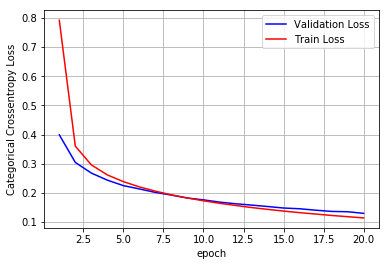

In [16]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

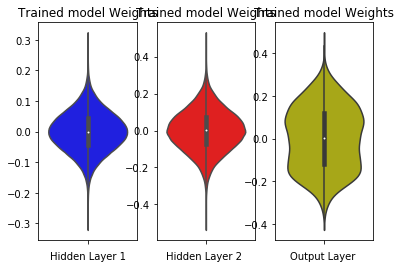

In [17]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>mlp + relu + Adam Optimizer</h2>

In [18]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.065  => N(0,σ) = N(0,0.065)
# h2 =>  σ=√(2/(fan_in) = 0.109  => N(0,σ) = N(0,0.109)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(472, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)))
model_relu.add(Dense(168, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.109, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 472)               370520    
_________________________________________________________________
dense_6 (Dense)              (None, 168)               79464     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1690      
Total params: 451,674
Trainable params: 451,674
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.2307 - acc: 0.9314 - val_loss: 0.1007 - val_acc: 0.9693
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0835 - acc: 0.9745 - val_loss: 0.0830 - val_acc: 0.9743
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0524 - acc: 0.9837 - val_loss: 0.0770 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0367 - acc: 0.9880 - val_loss: 0.0718 - val_acc: 0.9771
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0261 - acc: 0.9915 - val_loss: 0.0663 - val_acc: 0.9806
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0199 - acc: 0.9935 - val_loss: 0.0708 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0178 - acc: 0.9941 - val_loss: 0.0747 - val_acc

Test score: 0.0860286440363001
Test accuracy: 0.9817


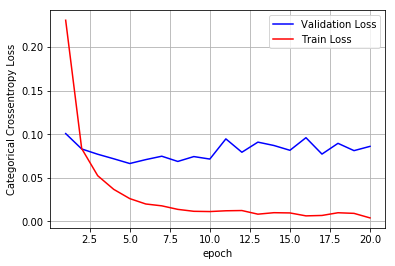

In [20]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

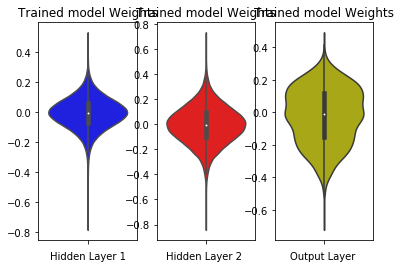

In [21]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + RELU + ADAM OPTIMIZER + BATCH NORMALIZATION </h2>

In [23]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.065  => N(0,σ) = N(0,0.065)
# h2 =>  σ=√(2/(fan_in) = 0.109  => N(0,σ) = N(0,0.109)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(472, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(168, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.109, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 472)               370520    
_________________________________________________________________
batch_normalization_1 (Batch (None, 472)               1888      
_________________________________________________________________
dense_10 (Dense)             (None, 168)               79464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 168)               672       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1690      
Total params: 454,234
Trainable params: 452,954
Non-trainable params: 1,280
_________________________________________________________________


In [24]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1954 - acc: 0.9410 - val_loss: 0.1075 - val_acc: 0.9658
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0692 - acc: 0.9795 - val_loss: 0.0852 - val_acc: 0.9740
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0418 - acc: 0.9869 - val_loss: 0.0840 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0298 - acc: 0.9911 - val_loss: 0.0766 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0231 - acc: 0.9924 - val_loss: 0.0797 - val_acc: 0.9770
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0195 - acc: 0.9937 - val_loss: 0.0668 - val_acc: 0.9800
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0157 - acc: 0.9952 - val_loss: 0.0727 - val_acc

Test score: 0.0841681836363352
Test accuracy: 0.9807


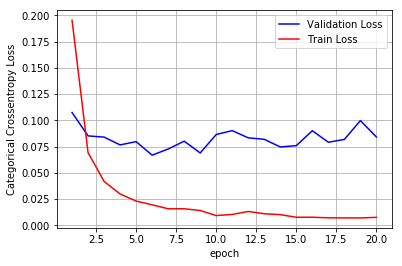

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

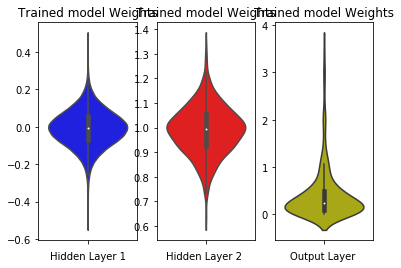

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + RELU + DROPOUT + ADAM OPTIMIZER </h2>

In [27]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.065  => N(0,σ) = N(0,0.065)
# h2 =>  σ=√(2/(fan_in) = 0.109  => N(0,σ) = N(0,0.109)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(472, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)))
model.add(Dropout(0.5))
model_relu.add(Dense(168, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.109, seed=None)) )
model.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

W0817 13:47:08.223122 139700284381056 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 472)               370520    
_________________________________________________________________
dense_13 (Dense)             (None, 168)               79464     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1690      
Total params: 451,674
Trainable params: 451,674
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.7843 - acc: 0.7836 - val_loss: 0.4119 - val_acc: 0.8868
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3723 - acc: 0.8953 - val_loss: 0.3164 - val_acc: 0.9124
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3048 - acc: 0.9137 - val_loss: 0.2720 - val_acc: 0.9225
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2682 - acc: 0.9234 - val_loss: 0.2463 - val_acc: 0.9300
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2437 - acc: 0.9299 - val_loss: 0.2292 - val_acc: 0.9341
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2246 - acc: 0.9360 - val_loss: 0.2136 - val_acc: 0.9395
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2095 - acc: 0.9400 - val_loss: 0.2005 - val_acc

Test score: 0.12899360538870097
Test accuracy: 0.9618


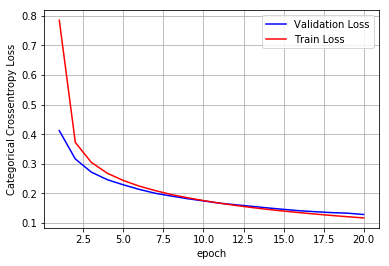

In [29]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

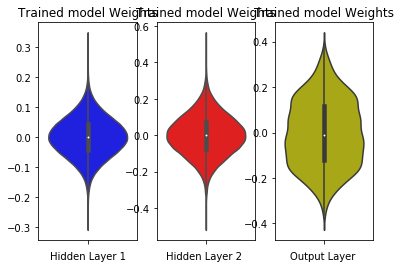

In [30]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1>3 layer </h1>

<h2>MLP+ RELU +  SGD optimization</h2>

In [31]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.088  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# h3 =>  σ=√(2/(fan_in) = 0.176  => N(0,σ) = N(0,0.176)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.8025 - acc: 0.7554 - val_loss: 0.4048 - val_acc: 0.8777
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3651 - acc: 0.8930 - val_loss: 0.3036 - val_acc: 0.9084
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2945 - acc: 0.9135 - val_loss: 0.2598 - val_acc: 0.9212
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2563 - acc: 0.9243 - val_loss: 0.2343 - val_acc: 0.9296
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2303 - acc: 0.9320 - val_loss: 0.2198 - val_acc: 0.9339
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2104 - acc: 0.9379 - val_loss: 0.2000 - val_acc: 0.9409
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1946 - acc: 0.9426 - val_loss: 0.1929 - val_acc

Test score: 0.12580863670054823
Test accuracy: 0.9612


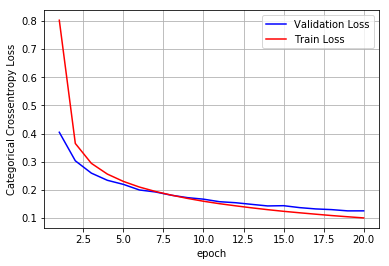

In [33]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histroy we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

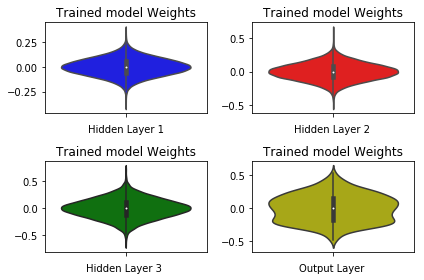

In [34]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
fig.tight_layout()
plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> MLP + RELU + Adam optimization</h1>

In [35]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.088  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# h3 =>  σ=√(2/(fan_in) = 0.176  => N(0,σ) = N(0,0.176)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )


model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.2668 - acc: 0.9188 - val_loss: 0.1305 - val_acc: 0.9605
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0990 - acc: 0.9702 - val_loss: 0.0927 - val_acc: 0.9717
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0649 - acc: 0.9795 - val_loss: 0.0996 - val_acc: 0.9695
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0445 - acc: 0.9860 - val_loss: 0.0872 - val_acc: 0.9745
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0329 - acc: 0.9894 - val_loss: 0.0925 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0269 - acc: 0.9911 - val_loss: 0.0944 - val_acc: 0.9749
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0237 - acc: 0.9922 - val_loss: 0.0898 - val_acc

Test score: 0.10433690159177686
Test accuracy: 0.9796


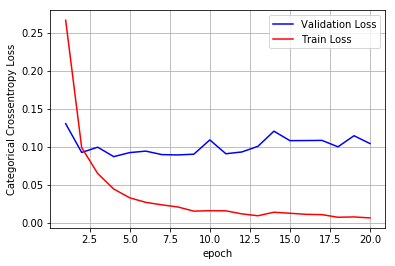

In [37]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histroy we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

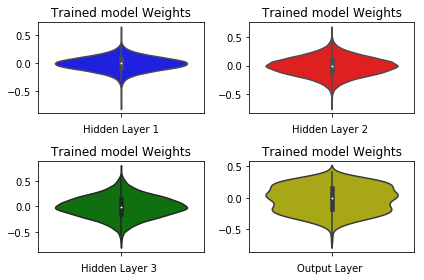

In [38]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
fig.tight_layout()
plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

__from above observation we understand that <br>
for 20 epochs adams accuracy is greater than sgd so we use adam<br>
for batch normalization and dropout__</br>

<h2>MLP + RELU + BatchNormalization + Adam optimizer</h2>

In [39]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.088  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# h3 =>  σ=√(2/(fan_in) = 0.176  => N(0,σ) = N(0,0.176)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_relu.add(BatchNormalization())


model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total para

In [40]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2798 - acc: 0.9189 - val_loss: 0.1238 - val_acc: 0.9629
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0949 - acc: 0.9722 - val_loss: 0.0960 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0592 - acc: 0.9819 - val_loss: 0.0845 - val_acc: 0.9727
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0407 - acc: 0.9880 - val_loss: 0.0867 - val_acc: 0.9741
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0299 - acc: 0.9909 - val_loss: 0.0734 - val_acc: 0.9785
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0252 - acc: 0.9916 - val_loss: 0.0832 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0202 - acc: 0.9932 - val_loss: 0.0819 - val_acc

Test score: 0.09795976593990927
Test accuracy: 0.9774


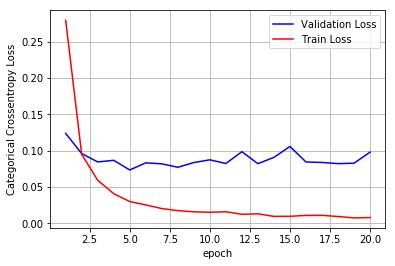

In [41]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histroy we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

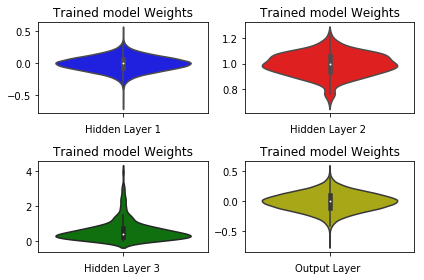

In [42]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
fig.tight_layout()
plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + relu + adam + dropout</h2>

In [43]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.088  => N(0,σ) = N(0,0.088)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# h3 =>  σ=√(2/(fan_in) = 0.176  => N(0,σ) = N(0,0.176)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_relu.add(Dropout(0.5))


model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total para

In [44]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 1.3283 - acc: 0.5617 - val_loss: 0.3393 - val_acc: 0.9102
Epoch 2/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.5220 - acc: 0.8509 - val_loss: 0.2290 - val_acc: 0.9411
Epoch 3/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.3859 - acc: 0.8994 - val_loss: 0.1837 - val_acc: 0.9503
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.3184 - acc: 0.9172 - val_loss: 0.1583 - val_acc: 0.9543
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2708 - acc: 0.9290 - val_loss: 0.1485 - val_acc: 0.9597
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2416 - acc: 0.9376 - val_loss: 0.1304 - val_acc: 0.9634
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2272 - acc: 0.9420 - val_loss: 0.1247 - val_acc

Test score: 0.08857314380939352
Test accuracy: 0.9776


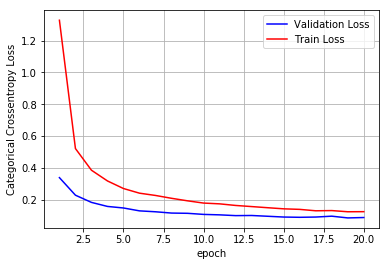

In [45]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histroy we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

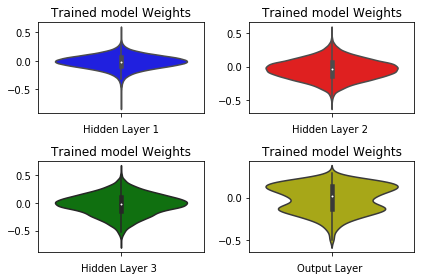

In [46]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')
fig.tight_layout()
plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1>Neural Network with 5 hidden layer</h1>

<h2> MLP + Relu + SGD optimizer</h2>

In [47]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.068  => N(0,σ) = N(0,0.068)
# h2 =>  σ=√(2/(fan_in) = 0.074  => N(0,σ) = N(0,0.074)
# h3 =>  σ=√(2/(fan_in) = 0.093  => N(0,σ) = N(0,0.093)
# h3 =>  σ=√(2/(fan_in) = 0.123  => N(0,σ) = N(0,0.123)
# h3 =>  σ=√(2/(fan_in) = 0.149  => N(0,σ) = N(0,0.149)

# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(422, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.068, stddev=0.062, seed=None)))
model_relu.add(Dense(356, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)) )
model_relu.add(Dense(229, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.093, seed=None)) )
model_relu.add(Dense(132, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.123, seed=None)) )
model_relu.add(Dense(88, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.149, seed=None)) )



model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 422)               331270    
_________________________________________________________________
dense_32 (Dense)             (None, 356)               150588    
_________________________________________________________________
dense_33 (Dense)             (None, 229)               81753     
_________________________________________________________________
dense_34 (Dense)             (None, 132)               30360     
_________________________________________________________________
dense_35 (Dense)             (None, 88)                11704     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                890       
Total params: 606,565
Trainable params: 606,565
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/step - loss: 14.4597 - acc: 0.1023 - val_loss: 14.4901 - val_acc: 0.1010
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 14.4711 - acc: 0.1022 - val_loss: 14.4901 - val_acc: 0.1010
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 14.4711 - acc: 0.1022 - val_loss: 14.4901 - val_acc: 0.1010
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 14.4711 - acc: 0.1022 - val_loss: 14.4901 - val_acc: 0.1010
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 14.4711 - acc: 0.1022 - val_loss: 14.4901 - val_acc: 0.1010
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 14.4711 - acc: 0.1022 - val_loss: 14.4901 - val_acc: 0.1010
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 14.4711 - acc: 0.1022 - val_loss: 14.

Test score: 14.490134178161622
Test accuracy: 0.101


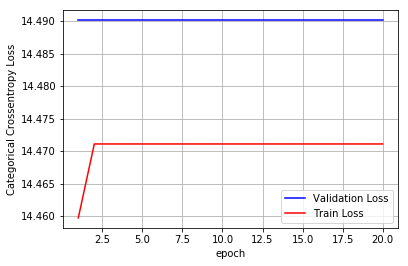

In [49]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histroy we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

__observation :-__
    loss for both relu and sgmoid is more so we take less no of neurons in layers

<h2>mlp + relu + Adam optimizer</h2>

In [50]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# h2 =>  σ=√(2/(fan_in) = 0.1  => N(0,σ) = N(0,0.1)
# h3 =>  σ=√(2/(fan_in) = 0.115  => N(0,σ) = N(0,0.115)
# h3 =>  σ=√(2/(fan_in) = 0.14  => N(0,σ) = N(0,0.123)
# h3 =>  σ=√(2/(fan_in) = 0.2  => N(0,σ) = N(0,0.149)

# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.89, seed=None)))
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_relu.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.115, seed=None)) )
model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)) )
model_relu.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )



model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_38 (Dense)             (None, 200)               50200     
_________________________________________________________________
dense_39 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_40 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_41 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                510       
Total params: 297,260
Trainable params: 297,260
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.5637 - acc: 0.8498 - val_loss: 0.2377 - val_acc: 0.9287
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1831 - acc: 0.9441 - val_loss: 0.1903 - val_acc: 0.9441
Epoch 3/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1273 - acc: 0.9609 - val_loss: 0.1508 - val_acc: 0.9561
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0905 - acc: 0.9712 - val_loss: 0.1435 - val_acc: 0.9556
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0682 - acc: 0.9777 - val_loss: 0.1267 - val_acc: 0.9642
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0556 - acc: 0.9826 - val_loss: 0.1341 - val_acc: 0.9653
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0501 - acc: 0.9838 - val_loss: 0.1568 - val_acc

Test score: 0.153974126256089
Test accuracy: 0.9713


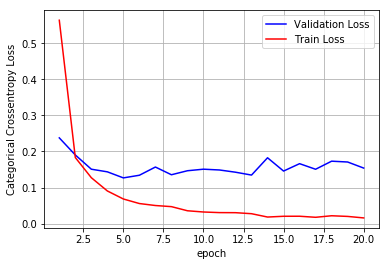

In [52]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histroy we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

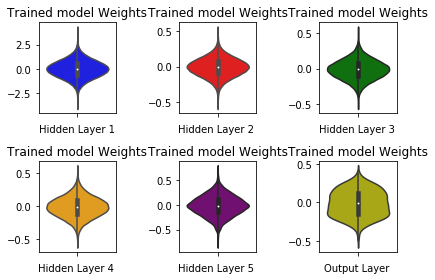

In [53]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='orange')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2,3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='purple')
plt.xlabel('Hidden Layer 5 ')

fig.tight_layout()
plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + RELU + Adam optimizer+ Batch Normalization</h2>

In [54]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# h2 =>  σ=√(2/(fan_in) = 0.1  => N(0,σ) = N(0,0.1)
# h3 =>  σ=√(2/(fan_in) = 0.115  => N(0,σ) = N(0,0.115)
# h3 =>  σ=√(2/(fan_in) = 0.14  => N(0,σ) = N(0,0.123)
# h3 =>  σ=√(2/(fan_in) = 0.2  => N(0,σ) = N(0,0.149)

# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.89, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.115, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model_relu.add(BatchNormalization())



model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 250)               196250    
_________________________________________________________________
batch_normalization_6 (Batch (None, 250)               1000      
_________________________________________________________________
dense_44 (Dense)             (None, 200)               50200     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)               800       
_________________________________________________________________
dense_45 (Dense)             (None, 150)               30150     
_________________________________________________________________
batch_normalization_8 (Batch (None, 150)               600       
_________________________________________________________________
dense_46 (Dense)             (None, 100)               15100     
__________

In [55]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.3847 - acc: 0.8840 - val_loss: 0.1603 - val_acc: 0.9496
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.1304 - acc: 0.9605 - val_loss: 0.1120 - val_acc: 0.9655
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0812 - acc: 0.9752 - val_loss: 0.1042 - val_acc: 0.9661
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0577 - acc: 0.9823 - val_loss: 0.0991 - val_acc: 0.9692
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0425 - acc: 0.9869 - val_loss: 0.1037 - val_acc: 0.9692
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0359 - acc: 0.9885 - val_loss: 0.1092 - val_acc: 0.9685
Epoch 7/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0291 - acc: 0.9902 - val_loss: 0.1045 - val_ac

Test score: 0.10156176672805195
Test accuracy: 0.9766


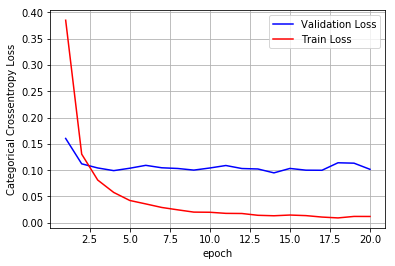

In [56]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histroy we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

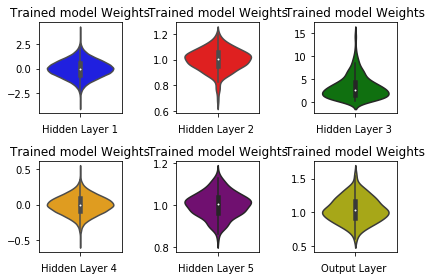

In [57]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='orange')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2,3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='purple')
plt.xlabel('Hidden Layer 5 ')

fig.tight_layout()
plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + RELU + ADAM Optimizer + Dropout<h2>

In [58]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# h2 =>  σ=√(2/(fan_in) = 0.1  => N(0,σ) = N(0,0.1)
# h3 =>  σ=√(2/(fan_in) = 0.115  => N(0,σ) = N(0,0.115)
# h3 =>  σ=√(2/(fan_in) = 0.14  => N(0,σ) = N(0,0.123)
# h3 =>  σ=√(2/(fan_in) = 0.2  => N(0,σ) = N(0,0.149)

# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.89, seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.115, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model_relu.add(Dropout(0.5))



model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 250)               196250    
_________________________________________________________________
dropout_6 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 200)               50200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 150)               30150     
_________________________________________________________________
dropout_8 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 100)               15100     
__________

In [59]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 13.7541 - acc: 0.1241 - val_loss: 8.9717 - val_acc: 0.3142
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 10.5328 - acc: 0.2077 - val_loss: 2.2152 - val_acc: 0.1567
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 2.4233 - acc: 0.1575 - val_loss: 2.0644 - val_acc: 0.2036
Epoch 4/20
60000/60000 [==============================] - 3s 43us/step - loss: 2.1777 - acc: 0.1905 - val_loss: 1.9930 - val_acc: 0.2384
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 2.0809 - acc: 0.2203 - val_loss: 1.8477 - val_acc: 0.2834
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 1.9980 - acc: 0.2477 - val_loss: 1.8200 - val_acc: 0.2869
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 1.9416 - acc: 0.2612 - val_loss: 1.7977 - val_a

Test score: 0.47206720638275146
Test accuracy: 0.8304


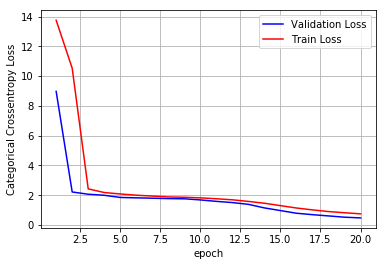

In [60]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histroy we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1> COnclusion </h1>

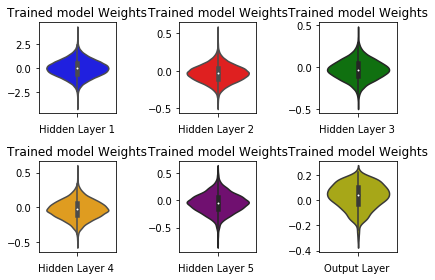

In [61]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='orange')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2,3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='purple')
plt.xlabel('Hidden Layer 5 ')

fig.tight_layout()
plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [81]:
from prettytable import PrettyTable
print('\n')
print("----------------------------------------------2 Layer----------------------------------------------------------")
x = PrettyTable(["Model Name", "Training accuracy", "Test accuracy ", "Loss"])
print('\n')
x.add_row([" MLP + RELU + SGD ",0.9679, 0.9626, 0.1295])
x.add_row([" MLP + RELU + Adam ",0.9989, 0.9817, 0.0860])
x.add_row([" MLP + RELU + Adam + Batch Normalization ",0.9974, 0.9807, 0.0842])
x.add_row(["MLP + RELU + Adam + Dropout", 0.9669,0.9618, 0.1290])

print(x)

print('\n')
print("----------------------------------------------3 Layer----------------------------------------------------------")
print('\n')
x1 = PrettyTable(["Model Name", "Training accuracy", "Test accuracy ", "Loss"])
x1.add_row([" MLP + RELU + SGD ",0.9712, 0.9612, 0.1258])
x1.add_row([" MLP + RELU + Adam ",0.9979, 0.9796, 0.1043])
x1.add_row([" MLP + RELU + Adam + Batch Normalization ",0.9972, 0.9774, 0.0980])
x1.add_row(["MLP + RELU + Adam + Dropout", 0.9671,0.9776, 0.0886])

print(x1)

print('\n')
print("----------------------------------------------5 Layer----------------------------------------------------------")
print('\n')
x2 = PrettyTable(["Model Name", "Training accuracy", "Test accuracy ", "Loss"])
x2.add_row([" MLP + RELU + SGD ",0.85, 0.101, 14.4])
x2.add_row([" MLP + RELU + Adam ",0.9952, 0.9713, 0.1540])
x2.add_row([" MLP + RELU + Adam + Batch Normalization ",0.9956, 0.9766, 0.1016])
x2.add_row(["MLP + RELU + Adam + Dropout", 0.7460,0.83, 0.8304])

print(x2)





----------------------------------------------2 Layer----------------------------------------------------------


+-------------------------------------------+-------------------+----------------+--------+
|                 Model Name                | Training accuracy | Test accuracy  |  Loss  |
+-------------------------------------------+-------------------+----------------+--------+
|              MLP + RELU + SGD             |       0.9679      |     0.9626     | 0.1295 |
|             MLP + RELU + Adam             |       0.9989      |     0.9817     | 0.086  |
|  MLP + RELU + Adam + Batch Normalization  |       0.9974      |     0.9807     | 0.0842 |
|        MLP + RELU + Adam + Dropout        |       0.9669      |     0.9618     | 0.129  |
+-------------------------------------------+-------------------+----------------+--------+


----------------------------------------------3 Layer----------------------------------------------------------


+-------------------------------

<H2>OBSERVATION</H2>
1. ALL THE VALUE OF WEIGHTS ARE DISRIBUTED NICELY<BR>
2. IN ALL THE ARCHITECTURE OF BATCH NORMALIZATION THE WEIGHT ARE SHIFTED FROM 0 AND 1.<BR>
3. THE HIGHEST ACCURACY WE GET IS OF 98.17 FROM 2 HIDDEN LAYER AND BATCH NORMALIZATION